In [1215]:
# Import the dependencies.
# Mandatory
from sqlalchemy import create_engine, text, inspect, URL

# ORM imports - for classes
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base

#data science
import pandas as pd
import matplotlib.pyplot as plt

# Other imports
import seaborn as sns
import datetime as dt
import config as cfg


In [1216]:
# Setup the SQL connection variables
SQL_USERNAME = cfg.SQL_USERNAME
SQL_PASSWORD = cfg.SQL_PASSWORD
SQL_IP = cfg.SQL_IP
SQL_PORT = cfg.SQL_PORT
DATABASE = cfg.DATABASE

In [1217]:
# Construct the URL
SQLALCHEMY_DATABASE_URL = URL.create(
    drivername="postgresql",
    username=SQL_USERNAME,
    password=SQL_PASSWORD,
    host=SQL_IP,
    port=SQL_PORT,
    database=DATABASE,
)

# Create the engine
engine = create_engine(SQLALCHEMY_DATABASE_URL)

In [1218]:
# explore and understand the data
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
tables = inspector.get_table_names()
# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
print()

contact
contact_id INTEGER
first_name VARCHAR(30)
last_name VARCHAR(30)
email VARCHAR(50)
last_update TIMESTAMP
category
category_id VARCHAR(10)
category VARCHAR(50)
last_update TIMESTAMP
subcategory
subcategory_id VARCHAR(12)
subcategory VARCHAR(50)
last_update TIMESTAMP
campaign
funding_id INTEGER
contact_id INTEGER
company_name VARCHAR(50)
description VARCHAR(75)
goal NUMERIC
pledged NUMERIC
outcome VARCHAR(10)
backers_count INTEGER
country VARCHAR(2)
currency VARCHAR(3)
launched_date TIMESTAMP
end_date TIMESTAMP
staff_pick BOOLEAN
spotlight BOOLEAN
category_id VARCHAR(10)
subcategory_id VARCHAR(12)
last_update TIMESTAMP



In [1219]:
print(df.info)

<bound method DataFrame.info of      funding_id                company_name      goal   pledged     outcome  \
0          1621                    Odom Inc    1400.0   14560.0  successful   
1          1812  Melton, Robinson and Fritz  108400.0  142523.0  successful   
2          2057                Harris Group    7600.0   13195.0  successful   
3          2669               Carter-Guzman    4500.0   14741.0  successful   
4          2340                   Green Ltd    5200.0   13838.0  successful   
..          ...                         ...       ...       ...         ...   
560        3184                Wilson Group    6200.0   13441.0  successful   
561        2585               Hernandez Inc    2400.0   11990.0  successful   
562        2632                 Ramirez LLC    9800.0   11091.0  successful   
563         439                  Morrow Inc    3100.0   13223.0  successful   
564        2986            Manning-Hamilton   97300.0  153216.0  successful   

     backers_count 

In [1220]:
# campaigns that reached their funding goal
queries = {
    "campaigns_reached_goal": """
        SELECT
            camp.funding_id,
            camp.company_name,
            camp.goal,
            camp.pledged,
            camp.outcome,
            camp.backers_count,
            camp.country,
            camp.currency,
            camp.launched_date,
            camp.end_date
        FROM
            campaign
        WHERE
            pledged >= goal;
    """
}

# Execute the queries and store the results in DataFrames
dataframes = {}

for query_name, query in queries.items():
    try:
        df = pd.read_sql(query, con=engine)
        dataframes[query_name] = df
        print(f"Query '{query_name}' executed successfully. DataFrame head:")
        print(df.head())
    except Exception as e:
        print(f"An error occurred while executing query '{query_name}': {e}")

# Now 'dataframes' dictionary contains all the resulting DataFrames


An error occurred while executing query 'campaigns_reached_goal': (psycopg2.errors.UndefinedTable) missing FROM-clause entry for table "camp"
LINE 3:             camp.funding_id,
                    ^

[SQL: 
        SELECT
            camp.funding_id,
            camp.company_name,
            camp.goal,
            camp.pledged,
            camp.outcome,
            camp.backers_count,
            camp.country,
            camp.currency,
            camp.launched_date,
            camp.end_date
        FROM
            campaign
        WHERE
            pledged >= goal;
    ]
(Background on this error at: https://sqlalche.me/e/20/f405)


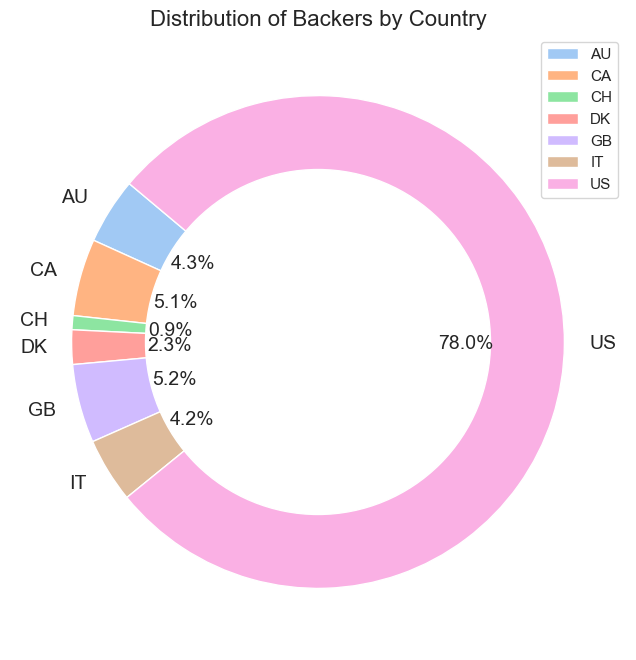

In [1221]:
# Donut Chart: Distribution of backers across countries
backers_by_country = df.groupby('country')['backers_count'].sum().reset_index()

# Define a color palette
colors = sns.color_palette('pastel')[0:len(backers_by_country)]

plt.figure(figsize=(12, 8))
plt.pie(backers_by_country['backers_count'], 
        labels=backers_by_country['country'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,
        textprops={'fontsize': 14}, 
        wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a white circle at the center
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a legend
plt.legend(backers_by_country['country'], loc="best", bbox_to_anchor=(1, 1))

# Title
plt.title('Distribution of Backers by Country', fontsize=16)
plt.show()

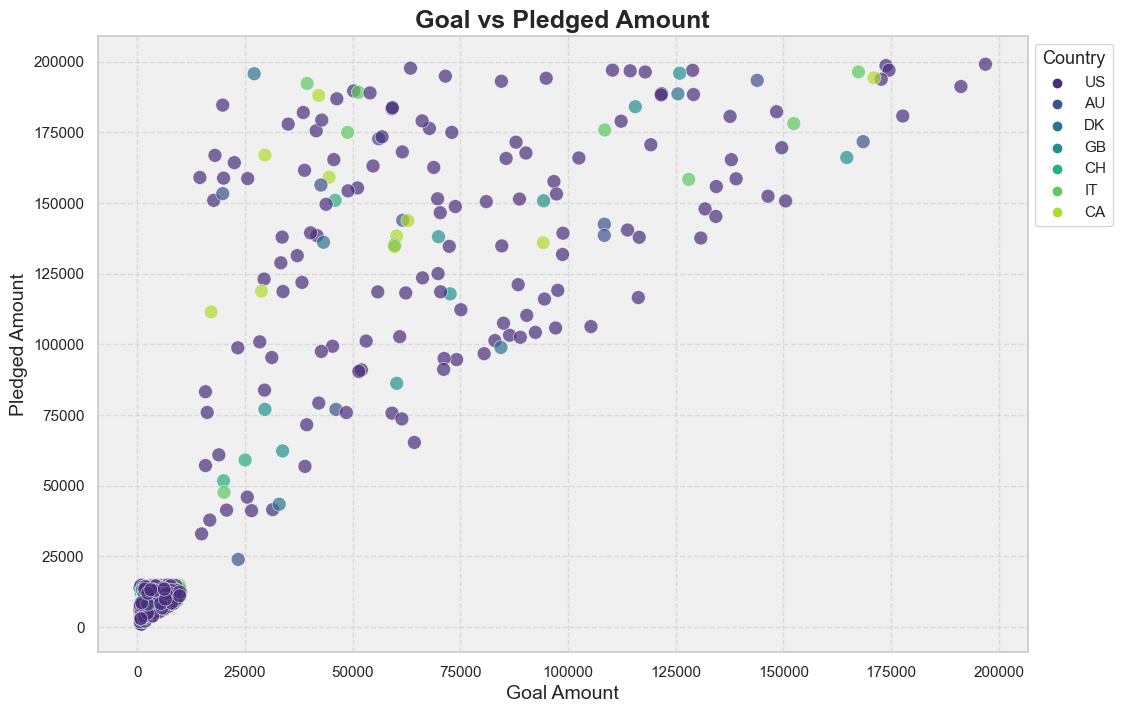

In [1222]:
# Scatter Plot: Relationship between goal and pledged amount
plt.figure(figsize=(12, 8))

# Enhanced scatter plot
sns.scatterplot(x='goal', y='pledged', data=df, hue='country', palette='viridis', s=100, alpha=0.7, edgecolor='w', linewidth=0.5)

# Title and labels with improved font sizes
plt.title('Goal vs Pledged Amount', fontsize=18, weight='bold')
plt.xlabel('Goal Amount', fontsize=14)
plt.ylabel('Pledged Amount', fontsize=14)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Legend customization
plt.legend(title='Country', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

# Background color
plt.gca().set_facecolor('#f0f0f0')

plt.show()

In [1223]:
# campaigns that are 10% or less of their funding goal
queries = {
    "campaigns_close_to_goal": """
        SELECT
            camp.funding_id,
            camp.company_name,
            camp.goal,
            camp.pledged,
            camp.outcome,
            camp.backers_count,
            camp.country,
            camp.currency,
            camp.launched_date,
            camp.end_date
        FROM
            campaign
        WHERE
            pledged >= goal * 0.9 AND pledged < goal;
    """,}
# Execute the queries and store the results in DataFrames
dataframes = {}

print(df.head())

   funding_id                company_name      goal   pledged     outcome  \
0        1621                    Odom Inc    1400.0   14560.0  successful   
1        1812  Melton, Robinson and Fritz  108400.0  142523.0  successful   
2        2057                Harris Group    7600.0   13195.0  successful   
3        2669               Carter-Guzman    4500.0   14741.0  successful   
4        2340                   Green Ltd    5200.0   13838.0  successful   

   backers_count country currency              launched_date  \
0            158      US      USD 1970-01-01 00:00:01.611554   
1           1425      AU      AUD 1970-01-01 00:00:01.608185   
2            174      DK      DKK 1970-01-01 00:00:01.607666   
3            227      DK      DKK 1970-01-01 00:00:01.608617   
4            220      US      USD 1970-01-01 00:00:01.594444   

                    end_date  duration  remaining  percentage_reached  
0 1970-01-01 00:00:01.621919         0   -13160.0         1040.000000  
1 1970-0

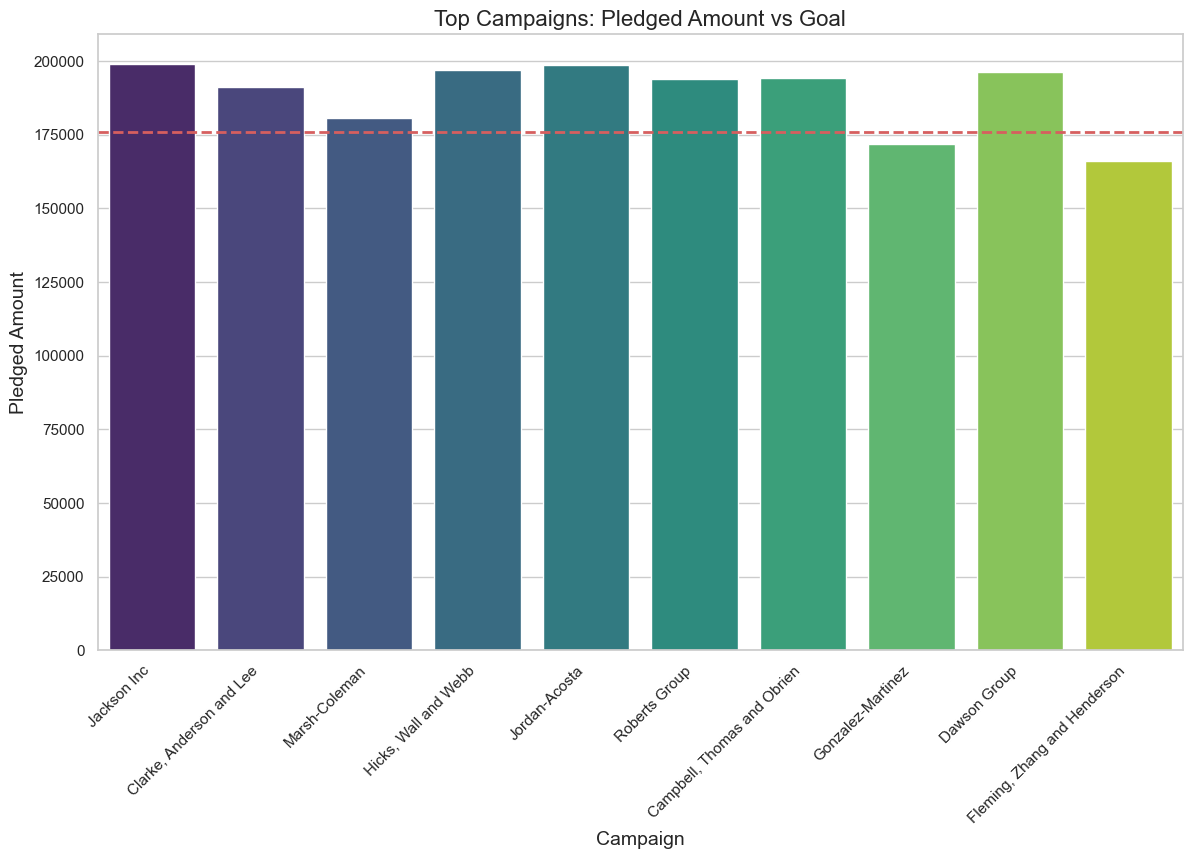

In [1224]:
# Sort and select top 10  campaigns
top_10 = 10
df_sorted = df.sort_values(by='goal', ascending=False).head(top_10)

# Bar Chart: Pledged vs. Goal for Top N Campaigns
plt.figure(figsize=(14, 8))
sns.barplot(x='company_name', y='pledged', data=df_sorted, palette='viridis')
plt.axhline(y=df_sorted['goal'].mean(), color='r', linestyle='--', linewidth=2)
plt.title('Top Campaigns: Pledged Amount vs Goal', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Pledged Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

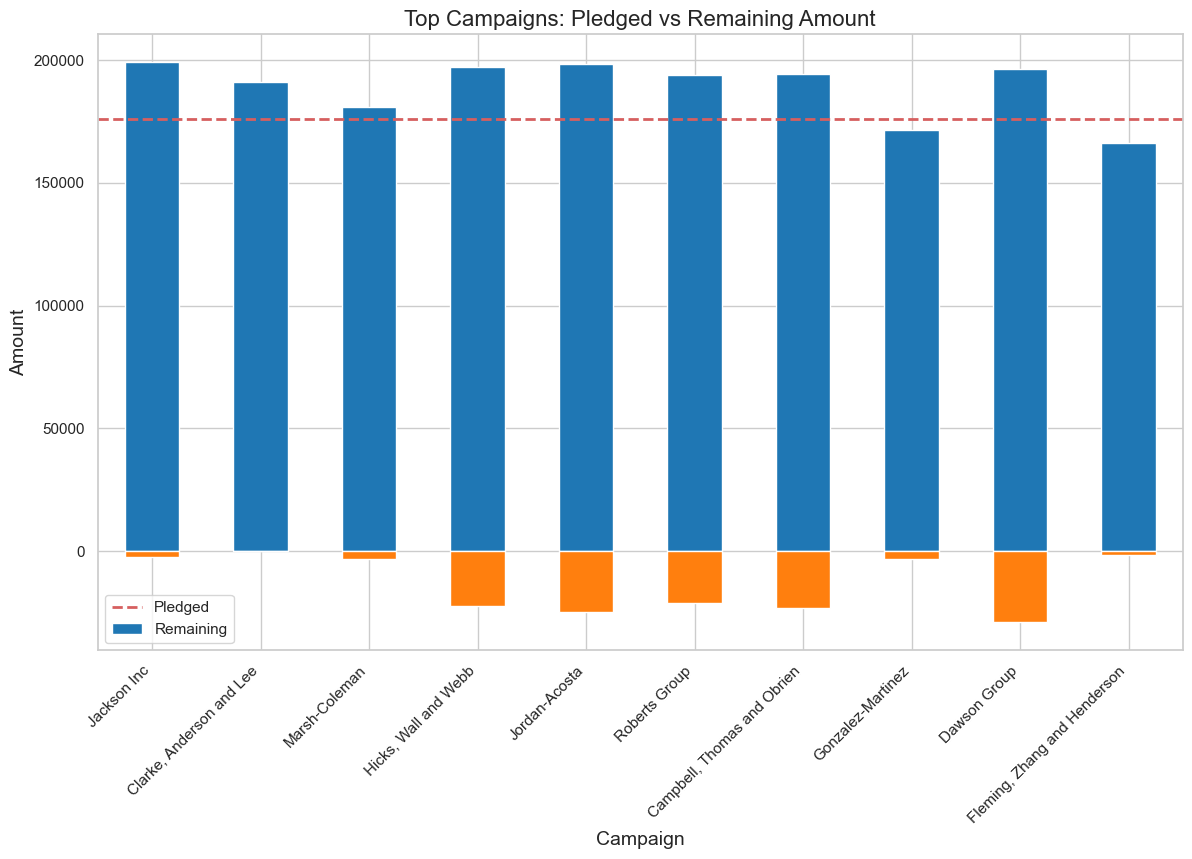

In [1225]:
# Calculate remaining amount to reach the goal
df['remaining'] = df['goal'] - df['pledged']

# Sort and select top 10  campaigns
df_sorted = df.sort_values(by='goal', ascending=False).head(top_10)

# Stacked Bar Chart: Pledged vs. Remaining for top 10 Campaigns
df_sorted.set_index('company_name')[['pledged', 'remaining']].plot(kind='bar', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e'])
plt.axhline(y=df_sorted['goal'].mean(), color='r', linestyle='--', linewidth=2)
plt.title('Top Campaigns: Pledged vs Remaining Amount', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(['Pledged', 'Remaining'])
plt.show()


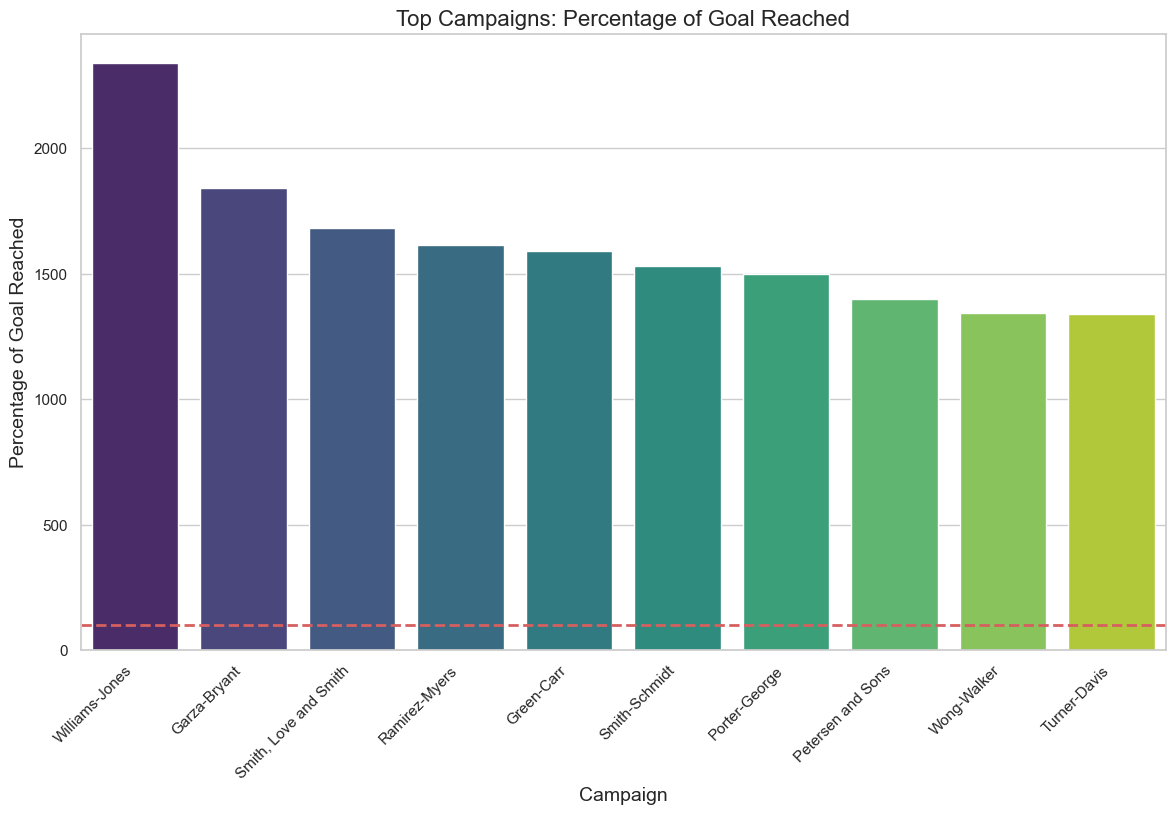

In [1226]:
# Calculate percentage of goal reached
df['percentage_reached'] = (df['pledged'] / df['goal']) * 100

# Sort and select top 10 campaigns
df_sorted = df.sort_values(by='percentage_reached', ascending=False).head(top_10)

# Progress Chart: Percentage of Goal Reached for top 10 Campaigns
plt.figure(figsize=(14, 8))
sns.barplot(x='company_name', y='percentage_reached', data=df_sorted, palette='viridis')
plt.axhline(y=100, color='r', linestyle='--', linewidth=2)
plt.title('Top Campaigns: Percentage of Goal Reached', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Percentage of Goal Reached', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


In [1227]:
# staff picks or spotlight that reached their funding goal
queries = {
"staff_picks_or_spotlight_successful": """
        SELECT
            funding_id,
            company_name,
            description,
            goal,
            pledged,
            outcome,
            backers_count,
            country,
            currency,
            launched_date,
            end_date,
            staff_pick,
            spotlight
        FROM
            campaign
        WHERE
            (staff_pick = TRUE OR spotlight = TRUE)
            AND pledged >= goal;
    """,}
# Execute the queries and store the results in DataFrames
dataframes = {}

print(df.head())

   funding_id                company_name      goal   pledged     outcome  \
0        1621                    Odom Inc    1400.0   14560.0  successful   
1        1812  Melton, Robinson and Fritz  108400.0  142523.0  successful   
2        2057                Harris Group    7600.0   13195.0  successful   
3        2669               Carter-Guzman    4500.0   14741.0  successful   
4        2340                   Green Ltd    5200.0   13838.0  successful   

   backers_count country currency              launched_date  \
0            158      US      USD 1970-01-01 00:00:01.611554   
1           1425      AU      AUD 1970-01-01 00:00:01.608185   
2            174      DK      DKK 1970-01-01 00:00:01.607666   
3            227      DK      DKK 1970-01-01 00:00:01.608617   
4            220      US      USD 1970-01-01 00:00:01.594444   

                    end_date  duration  remaining  percentage_reached  
0 1970-01-01 00:00:01.621919         0   -13160.0         1040.000000  
1 1970-0

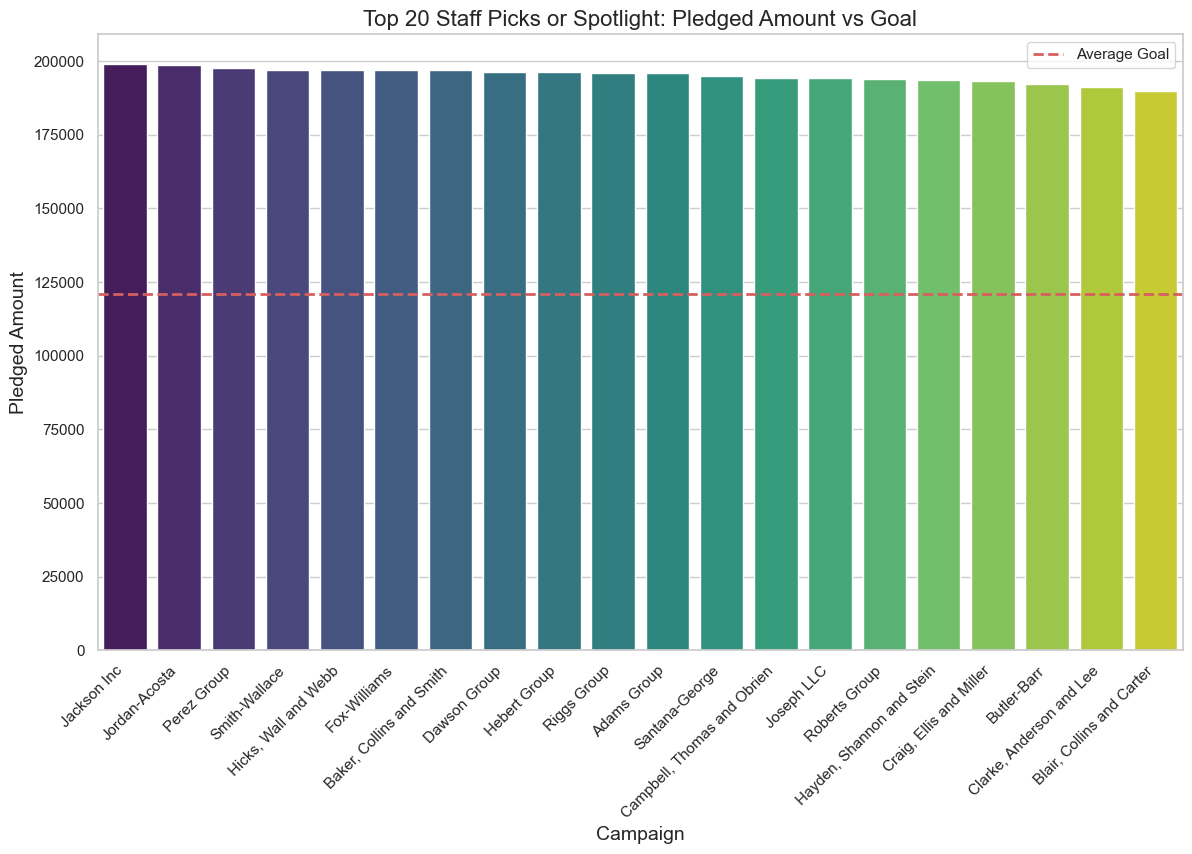

In [1228]:
# "staff picks" or "spotlight" campaigns that reached their funding goal
top_20 = 20
df_top = df.nlargest(top_n, 'pledged')

# Bar Chart: Pledged Amount vs Goal
plt.figure(figsize=(14, 8))
sns.barplot(x='company_name', y='pledged', data=df_top, palette='viridis')
plt.axhline(y=df_top['goal'].mean(), color='r', linestyle='--', linewidth=2, label='Average Goal')
plt.title('Top 20 Staff Picks or Spotlight: Pledged Amount vs Goal', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Pledged Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


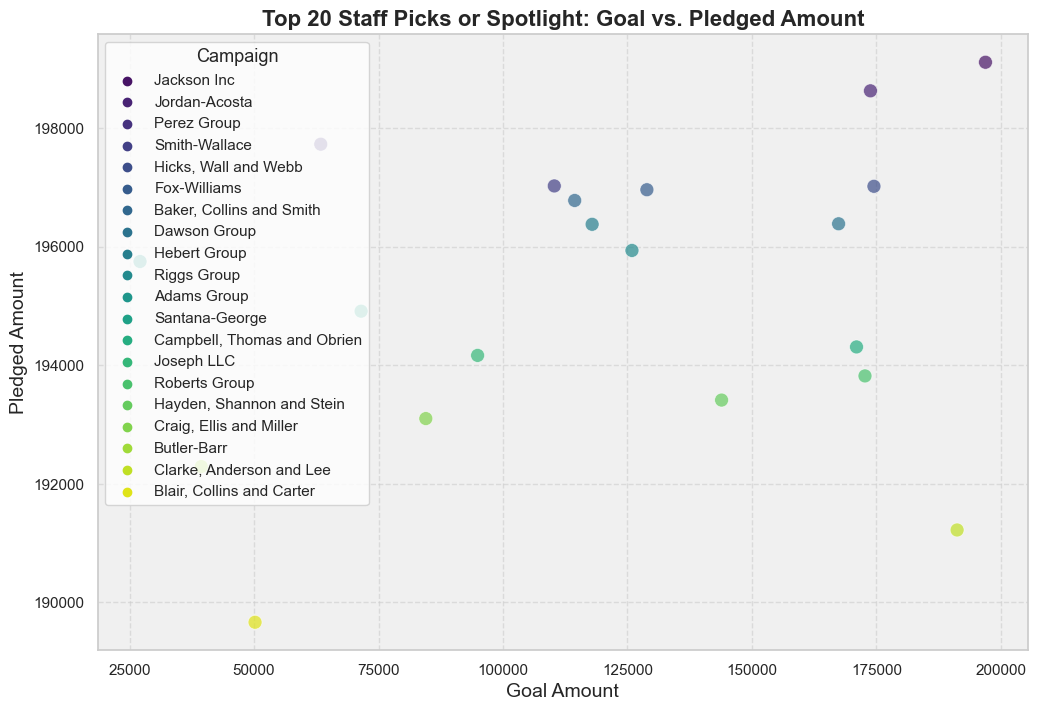

In [1229]:
# Scatter Plot: Goal vs. Pledged Amount
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goal', y='pledged', data=df_top, hue='company_name', palette='viridis', s=100, alpha=0.7, edgecolor='w', linewidth=0.5)
plt.title('Top 20 Staff Picks or Spotlight: Goal vs. Pledged Amount', fontsize=16, weight='bold')
plt.xlabel('Goal Amount', fontsize=14)
plt.ylabel('Pledged Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Campaign', title_fontsize='13', fontsize='11')
plt.gca().set_facecolor('#f0f0f0')
plt.show()


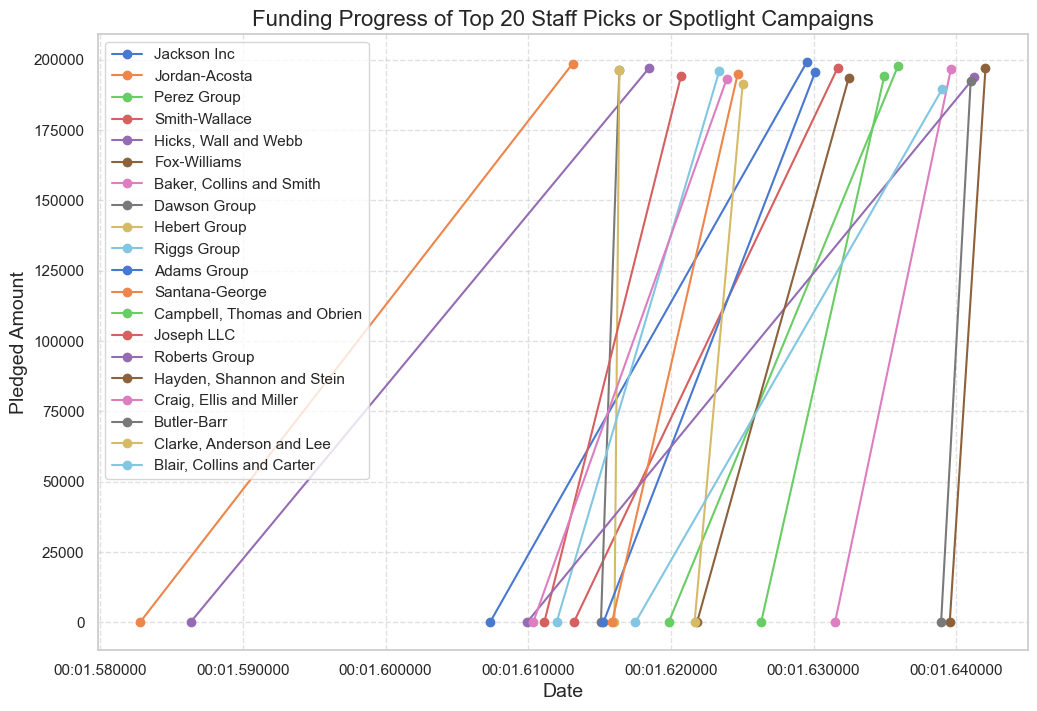

In [1230]:
#  Line Chart: Funding Progress
df_top['launched_date'] = pd.to_datetime(df_top['launched_date'])
df_top['end_date'] = pd.to_datetime(df_top['end_date'])
df_top['duration'] = (df_top['end_date'] - df_top['launched_date']).dt.days

plt.figure(figsize=(12, 8))
for i, row in df_top.iterrows():
    plt.plot([row['launched_date'], row['end_date']], [0, row['pledged']], marker='o', label=row['company_name'])

plt.title('Funding Progress of Top 20 Staff Picks or Spotlight Campaigns', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Pledged Amount', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [1231]:
#staff picks or spotlight that are 10% or less of their funding goal
queries = {
"staff_picks_or_spotlight_failed": """
        SELECT
            funding_id,
            company_name,
            description,
            goal,
            pledged,
            outcome,
            backers_count,
            country,
            currency,
            launched_date,
            end_date,
            staff_pick,
            spotlight
        FROM
            campaign
        WHERE
            (staff_pick = TRUE OR spotlight = TRUE)
            AND pledged < goal;
    """,}
# Execute the queries and store the results in DataFrames
dataframes = {}

print(df.head())

   funding_id                company_name      goal   pledged     outcome  \
0        1621                    Odom Inc    1400.0   14560.0  successful   
1        1812  Melton, Robinson and Fritz  108400.0  142523.0  successful   
2        2057                Harris Group    7600.0   13195.0  successful   
3        2669               Carter-Guzman    4500.0   14741.0  successful   
4        2340                   Green Ltd    5200.0   13838.0  successful   

   backers_count country currency              launched_date  \
0            158      US      USD 1970-01-01 00:00:01.611554   
1           1425      AU      AUD 1970-01-01 00:00:01.608185   
2            174      DK      DKK 1970-01-01 00:00:01.607666   
3            227      DK      DKK 1970-01-01 00:00:01.608617   
4            220      US      USD 1970-01-01 00:00:01.594444   

                    end_date  duration  remaining  percentage_reached  
0 1970-01-01 00:00:01.621919         0   -13160.0         1040.000000  
1 1970-0

<Figure size 1400x800 with 0 Axes>

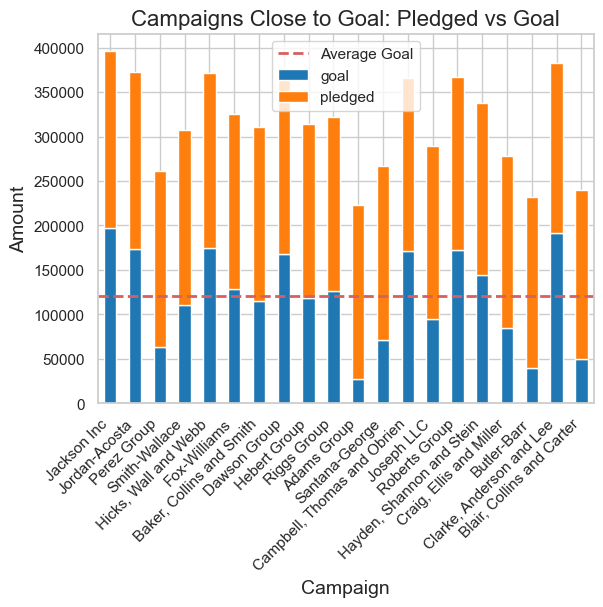

In [1232]:
# Limit to top 20 campaigns (or fewer if less data is available)
top_20 = 20
df_top = df.nlargest(top_20, 'pledged')

# Bar Chart: Pledged vs Goal
plt.figure(figsize=(14, 8))
df_top.set_index('company_name')[['goal', 'pledged']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.axhline(y=df_top['goal'].mean(), color='r', linestyle='--', linewidth=2, label='Average Goal')
plt.title('Campaigns Close to Goal: Pledged vs Goal', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

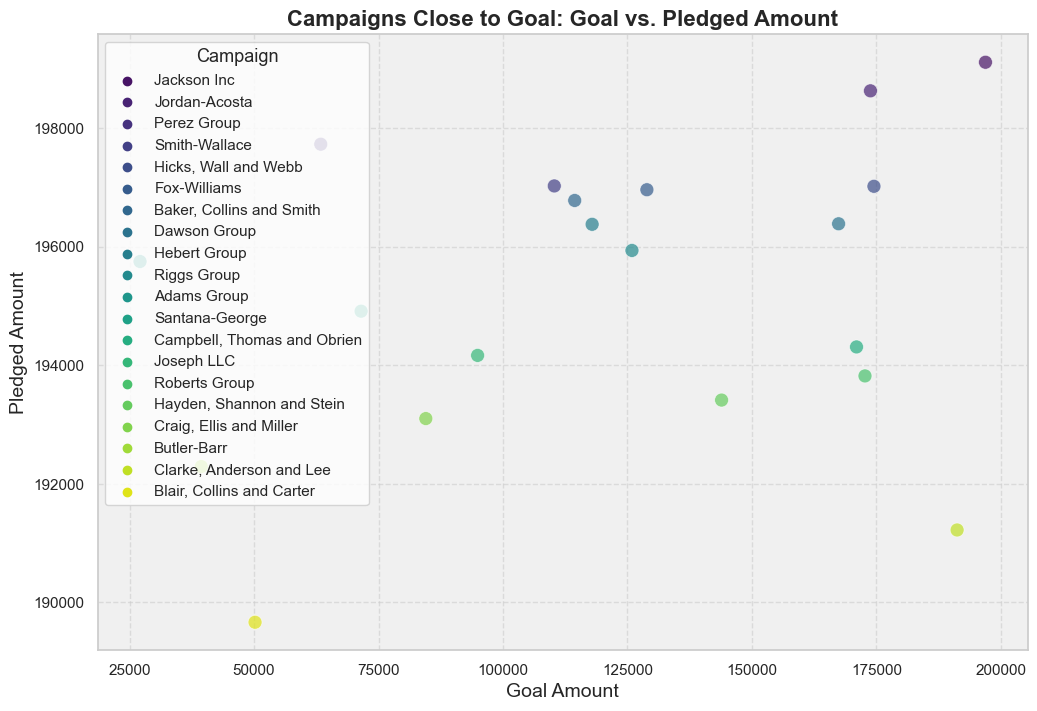

In [1233]:
#  Scatter Plot: Goal vs. Pledged Amount
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goal', y='pledged', data=df_top, hue='company_name', palette='viridis', s=100, alpha=0.7, edgecolor='w', linewidth=0.5)
plt.title('Campaigns Close to Goal: Goal vs. Pledged Amount', fontsize=16, weight='bold')
plt.xlabel('Goal Amount', fontsize=14)
plt.ylabel('Pledged Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Campaign', title_fontsize='13', fontsize='11')
plt.gca().set_facecolor('#f0f0f0')
plt.show()


In [1234]:
# campaigns that are staff picks or spotlight that reached their funding goal
queries = {
"staff_picks_or_spotlight_close_to_goal": """
        SELECT
            funding_id,
            company_name,
            description,
            goal,
            pledged,
            outcome,
            backers_count,
            country,
            currency,
            launched_date,
            end_date,
            staff_pick,
            spotlight
        FROM
            campaign
        WHERE
            (staff_pick = TRUE OR spotlight = TRUE)
            AND pledged >= goal * 0.9
            AND pledged < goal;
    """}
# Execute the queries and store the results in DataFrames
dataframes = {}

print(df.head())

   funding_id                company_name      goal   pledged     outcome  \
0        1621                    Odom Inc    1400.0   14560.0  successful   
1        1812  Melton, Robinson and Fritz  108400.0  142523.0  successful   
2        2057                Harris Group    7600.0   13195.0  successful   
3        2669               Carter-Guzman    4500.0   14741.0  successful   
4        2340                   Green Ltd    5200.0   13838.0  successful   

   backers_count country currency              launched_date  \
0            158      US      USD 1970-01-01 00:00:01.611554   
1           1425      AU      AUD 1970-01-01 00:00:01.608185   
2            174      DK      DKK 1970-01-01 00:00:01.607666   
3            227      DK      DKK 1970-01-01 00:00:01.608617   
4            220      US      USD 1970-01-01 00:00:01.594444   

                    end_date  duration  remaining  percentage_reached  
0 1970-01-01 00:00:01.621919         0   -13160.0         1040.000000  
1 1970-0

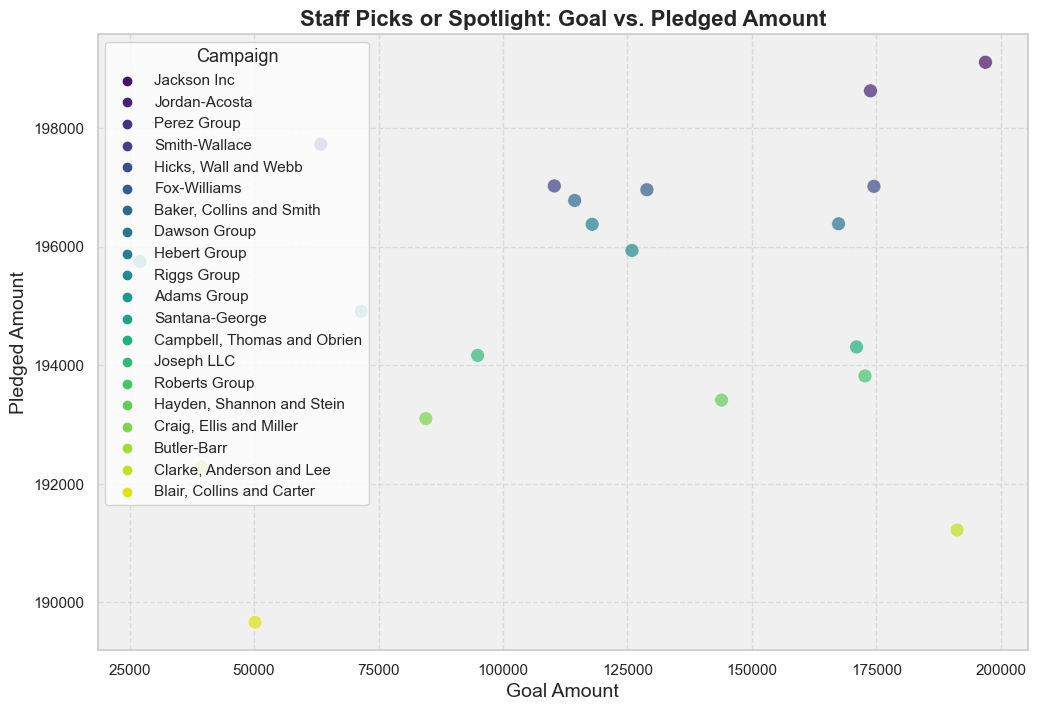

In [1235]:
#  Scatter Plot: Goal vs. Pledged Amount
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goal', y='pledged', data=df_top, hue='company_name', palette='viridis', s=100, alpha=0.7, edgecolor='w', linewidth=0.5)
plt.title('Staff Picks or Spotlight: Goal vs. Pledged Amount', fontsize=16, weight='bold')
plt.xlabel('Goal Amount', fontsize=14)
plt.ylabel('Pledged Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Campaign', title_fontsize='13', fontsize='11')
plt.gca().set_facecolor('#f0f0f0')
plt.show()

In [1236]:
# Query for full data
query = """
        SELECT
            cont.first_name,
            cont.last_name,
            cont.email,
            camp.company_name,
            camp.description,
            camp.goal,
            camp.pledged,
            camp.outcome,
            camp.backers_count,
            camp.country,
            camp.currency,
            camp.launched_date,
            camp.end_date,
            camp.staff_pick,
            camp.spotlight,
            cat.category,
            sub.subcategory
        FROM
            public.contact cont
        INNER JOIN public.campaign camp
            ON cont.contact_id = camp.contact_id
        INNER JOIN public.category cat
            ON camp.category_id = cat.category_id
        INNER JOIN public.subcategory sub
            ON camp.subcategory_id = sub.subcategory_id
        ;
        """
full_data_df = pd.read_sql(text(query), con=engine)
full_data_df.head()

,first_name,last_name,email,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category,subcategory
0,Cecilia,Velasco,cecilia.velasco@rodrigues.fr,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581574,1970-01-01 00:00:01.614578,False,False,food,food trucks
1,Mariana,Ellis,mariana.ellis@rossi.org,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1970-01-01 00:00:01.611554,1970-01-01 00:00:01.621919,False,True,music,rock
2,Sofie,Woods,sofie.woods@riviere.com,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1970-01-01 00:00:01.608185,1970-01-01 00:00:01.640844,False,False,technology,web
3,Jeanette,Iannotti,jeanette.iannotti@yahoo.com,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1970-01-01 00:00:01.634792,1970-01-01 00:00:01.642399,False,False,music,rock
4,Samuel,Sorgatz,samuel.sorgatz@gmail.com,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1970-01-01 00:00:01.608530,1970-01-01 00:00:01.629695,False,False,theater,plays


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


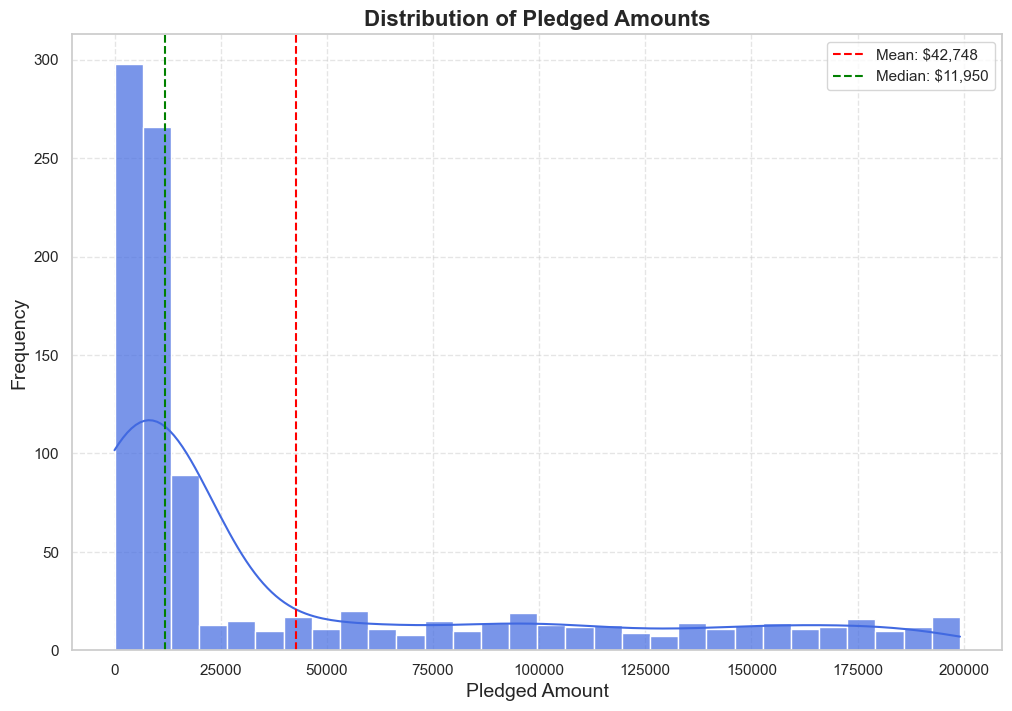

In [1237]:
# Set the style and color palette of the visualization
sns.set(style="whitegrid", palette="pastel")

# Create the histogram
plt.figure(figsize=(12, 8))
hist_plot = sns.histplot(full_data_df['pledged'], bins=30, kde=True, color='royalblue', alpha=0.7)

# Add title and labels with improved fonts
plt.title('Distribution of Pledged Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Pledged Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add annotations to show the mean and median
mean_value = full_data_df['pledged'].mean()
median_value = full_data_df['pledged'].median()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: ${mean_value:,.0f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: ${median_value:,.0f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


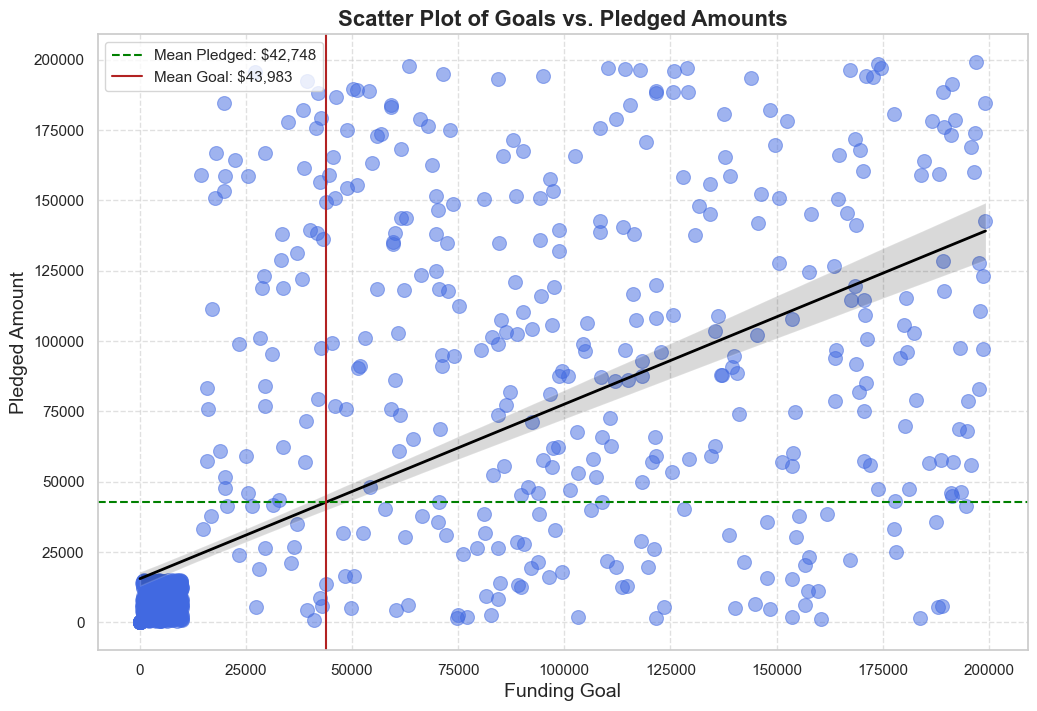

In [1238]:
# Set the style and color palette of the visualization
sns.set(style="whitegrid", palette="muted")

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='goal', y='pledged', data=full_data_df, alpha=0.5, s=100, color='royalblue', edgecolor=None)

# Add a regression line for trend visualization
sns.regplot(x='goal', y='pledged', data=full_data_df, scatter=False, color='black', line_kws={"linewidth":2, "linestyle":"solid"})

# Set the title and labels with improved fonts
plt.title('Scatter Plot of Goals vs. Pledged Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Funding Goal', fontsize=14)
plt.ylabel('Pledged Amount', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add annotations for mean values
mean_goal = full_data_df['goal'].mean()
mean_pledged = full_data_df['pledged'].mean()
plt.axhline(mean_pledged, color='green', linestyle='dashed', linewidth=1.5, label=f'Mean Pledged: ${mean_pledged:,.0f}')
plt.axvline(mean_goal, color='firebrick', linestyle='solid', linewidth=1.5, label=f'Mean Goal: ${mean_goal:,.0f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()



    Analysis of Crowdfunding Campaigns    
    
crowdfunding campaign data to assess campaign success, financial performance, backer distribution, and geographic and categorical trends. Key metrics include campaign outcomes, funding goals, and backer engagement.


    Campaign Success

The data shows a high success rate for campaigns, with a significant portion exceeding their funding goals. Successful campaigns generally outperform those that fail, suggesting effective fundraising strategies.


    Financial Performance

Average Pledged Amount: Campaigns tend to receive higher pledged amounts compared to their goals, indicating strong financial backing.
Total Pledged: The cumulative pledged amount across all campaigns reflects substantial overall support.
Campaigns Exceeding Goals: Many campaigns surpass their goals, highlighting effective strategies and high backer engagement.

    Backers Analysis

Average Number of Backers: On average, campaigns have a moderate number of backers, which correlates with the level of community engagement.
Pledged Amount Per Backer: The average pledge per backer provides insight into individual contribution levels, showing the extent of financial commitment.

    Geographic Insights

Campaign Distribution: Campaigns are concentrated in specific countries, indicating regional engagement levels.
Pledged Amount by Country: Some countries contribute more significantly to campaigns, reflecting higher financial support and engagement.

    Category Insights

Campaigns by Category: Certain categories are more popular, showing trends in campaign interests.
Pledged Amount by Category: Categories with the highest pledged amounts reveal areas of greatest financial support and interest.

    Temporal Analysis

Campaign Duration: The average duration of campaigns provides insights into typical fundraising timelines.

Funding Progress: Analysis of funding progress over time highlights successful strategies and trends in campaign performance.
Visualizations

    Conclusion
The analysis demonstrates a strong overall performance in crowdfunding campaigns, with many exceeding their funding goals and receiving substantial backer support. Geographic and categorical insights offer a deeper understanding of campaign trends, while temporal analysis provides valuable information on fundraising strategies. These findings can inform future crowdfunding efforts and strategic planning.